<a href="https://colab.research.google.com/github/s83512266/Tibame_AI_111-2_group2_project/blob/main/classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt # seaborn
from PIL import Image

import os # file path
from glob import glob # search files
from tqdm.auto import tqdm # progress bar

import tensorflow as tf
from tensorflow.keras import layers, models, utils

from sklearn.model_selection import train_test_split

**Read one image**

In [ ]:
IMG_SIZE = 256 # 256 128 64

all_class = ['MD', 'MA']
class_map = {cls: i for i, cls in enumerate(all_class)} #  'normal':0, 'bacteria': 1, 'virus':2
class_map

{'MD': 0, 'MA': 1}

In [ ]:
MD_path = glob("/content/drive/MyDrive/(a)龜背芋正常 (含幼葉、成熟葉)/截圖成正方形之圖片/截圖中間/*")
MA_path = glob('/content/drive/MyDrive/圖片/(i)非龜背芋種/龜背芋屬/窗口龜(洞洞蔓絲絨)/*.jpg')

img_paths_train = MD_path + MA_path

MD_path_test = glob("/content/drive/MyDrive/圖片/大家的照片/貞穎/正常龜背芋/*.jpeg")
MA_path_test = glob("/content/drive/MyDrive/圖片/大家的照片/貞穎/窗孔龜背芋/*.jpeg")
img_paths_test = MD_path_test + MA_path_test

In [ ]:
# number of images
len(img_paths_train), len(img_paths_test)

(182, 96)

/content/drive/MyDrive/圖片/大家的照片/貞穎/正常龜背芋/65873535_1254896871328000_8230942761335914496_n.jpeg
(960, 720, 3)


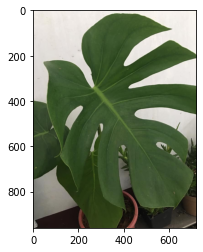

In [ ]:
# show image
path = img_paths_test[0]
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(path)
print(img.shape)
plt.imshow(img)
plt.show()

((960, 720, 3), (256, 256, 3))

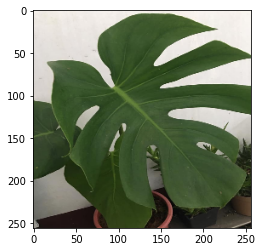

In [ ]:
# Resize  img
img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
plt.imshow(img_resized)
img.shape, img_resized.shape

In [ ]:
# Extract img class
# os.sep: /
print(path)
cls = path.split(os.sep)[-4]
print(cls)

/content/drive/MyDrive/圖片/大家的照片/貞穎/正常龜背芋/65873535_1254896871328000_8230942761335914496_n.jpeg
大家的照片


In [ ]:
# Extract img class
# os.sep: /
print(path)
cls_test = path.split(os.sep)[-2]
print(cls_test)

/content/drive/MyDrive/圖片/大家的照片/貞穎/正常龜背芋/65873535_1254896871328000_8230942761335914496_n.jpeg
正常龜背芋


In [ ]:
# Get file class index for train

# for MA class
if cls == '(i)非龜背芋種':
    cls_idx = class_map["MA"]
    print(cls_idx)
# for MD class
else:
    cls_idx = class_map["MD"]
    print(cls_idx)

0


In [ ]:
# Get file class index for test

# for MA class
if cls == '窗孔龜背芋':
    cls_idx = class_map["MA"]
    print(cls_idx)
# for MD class
else:
    cls_idx = class_map["MD"]
    print(cls_idx)

0


**Read all images**

In [ ]:
def read_data(paths):
    data_count = len(paths)
    x = np.zeros((data_count, IMG_SIZE, IMG_SIZE, 3)) # model input
    y = np.zeros((data_count, )) # answer

    for i, path in enumerate(tqdm(paths)):
        # read image
        img = cv2.imread(path) # (H, W, 3)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) # resize
        # Normalization
        img = img / 255. # 0~255 -> 0~1

        # read class index
        cls = path.split(os.sep)[-4]
        # for MA class
        if cls == '(i)非龜背芋種':
            cls_idx = class_map["MA"]
        # for MD class
        else:
            cls_idx = class_map["MD"]
        
        x[i] = img
        y[i] = cls_idx
    return x, y

def read_test_data(paths):
    data_count = len(paths)
    x = np.zeros((data_count, IMG_SIZE, IMG_SIZE, 3)) # model input
    y = np.zeros((data_count, )) # answer

    for i, path in enumerate(tqdm(paths)):
        # read image
        img = cv2.imread(path) # (H, W, 3)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) # resize
        # Normalization
        img = img / 255. # 0~255 -> 0~1

        # read class index
        cls = path.split(os.sep)[-2]
        # for MA class
        if cls == '窗孔龜背芋':
            cls_idx = class_map["MA"]
        # for MD class
        else:
            cls_idx = class_map["MD"]
        
        x[i] = img
        y[i] = cls_idx
    return x, y

In [ ]:
x_train, y_train = read_data(img_paths_train)
x_test, y_test = read_test_data(img_paths_test)

  0%|          | 0/182 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

In [ ]:
x_train.shape, y_train.shape

((182, 256, 256, 3), (182,))

In [ ]:
# label count
print(all_class)
# train
unique_classes, counts = np.unique(y_train, return_counts=True)
print(unique_classes, counts)

# test
unique_classes, counts = np.unique(y_test, return_counts=True)
print(unique_classes, counts)

['MD', 'MA']
[0. 1.] [148  34]
[0. 1.] [86 10]


In [ ]:
from sklearn.model_selection import train_test_split
# split train and test dataset
# 90%x, 10%x, 90%y, 10%y
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((163, 256, 256, 3), (19, 256, 256, 3), (163,), (19,))

In [ ]:
# one-hot encoding
y_train = utils.to_categorical(y_train, num_classes=len(class_map))
y_val = utils.to_categorical(y_val, num_classes=len(class_map))
y_test = utils.to_categorical(y_test, num_classes=len(class_map))

In [ ]:
y_train.shape, y_val.shape, y_test.shape

((163, 2), (19, 2), (96, 2))

**Build model**

In [ ]:
# Conv, BN, Activation
class ConvBN(layers.Layer):
    def __init__(self, filters, kernel_size):
        super().__init__()
        self.conv = layers.Conv2D(filters, kernel_size, padding="same")
        self.normalization = layers.BatchNormalization()
        self.act = layers.LeakyReLU()

    def call(self, x):
        x = self.conv(x)
        x = self.normalization(x)
        return self.act(x)

In [ ]:
class MyModel(tf.keras.models.Model):
    def __init__(self):
        super().__init__()
        self.encoder = models.Sequential([
            ConvBN(64, 3),
            ConvBN(64, 3),
            layers.MaxPool2D(2),
            ConvBN(128, 3),
            ConvBN(128, 3),
            layers.MaxPool2D(2),
            ConvBN(256, 3),
            ConvBN(256, 3),
            layers.MaxPool2D(2),
        ])
        # self.flatten = layers.Flatten()
        self.flatten = layers.GlobalAveragePooling2D()
        self.classifier = models.Sequential([
            layers.Dense(64, activation='relu'),
            layers.Dense(2, activation='softmax')               
        ])

    def call(self, x):
        print("Start call")
        x = self.encoder(x)
        x = self.flatten(x)
        x = self.classifier(x)
        return x


model = MyModel()
model.build((1, IMG_SIZE, IMG_SIZE, 3)) # (BS, H, W, C)

Start call


In [ ]:
model.encoder.summary()
model.classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_bn_6 (ConvBN)          (1, 256, 256, 64)         2048      
                                                                 
 conv_bn_7 (ConvBN)          (1, 256, 256, 64)         37184     
                                                                 
 max_pooling2d_3 (MaxPooling  (1, 128, 128, 64)        0         
 2D)                                                             
                                                                 
 conv_bn_8 (ConvBN)          (1, 128, 128, 128)        74368     
                                                                 
 conv_bn_9 (ConvBN)          (1, 128, 128, 128)        148096    
                                                                 
 max_pooling2d_4 (MaxPooling  (1, 64, 64, 128)         0         
 2D)                                                  

**Training model**

In [ ]:
# y_train是one-hot encoding，不能使用SparseCategoricalCrossentropy()
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    # ModelCheckpoint("best.h5", save_best_only=True),
    # subclassed models不能使用ModelCheckpoint存模型
    EarlyStopping(patience=5, restore_best_weights=True)
]

In [ ]:
logs = model.fit(x_train, y_train,
          batch_size=4,
          epochs=50,
          validation_data=(x_val, y_val),
          callbacks=callbacks
    )

Epoch 1/50
Start call
Start call
41/41 [==============================] - 240s 6s/step - loss: 0.5132 - accuracy: 0.7669 - val_loss: 0.5763 - val_accuracy: 0.9474
Epoch 2/50
41/41 [==============================] - 239s 6s/step - loss: 0.3784 - accuracy: 0.8037 - val_loss: 0.5810 - val_accuracy: 0.9474
Epoch 3/50
41/41 [==============================] - 235s 6s/step - loss: 0.3753 - accuracy: 0.8405 - val_loss: 0.4462 - val_accuracy: 0.9474
Epoch 4/50
41/41 [==============================] - 237s 6s/step - loss: 0.2749 - accuracy: 0.9018 - val_loss: 0.1737 - val_accuracy: 0.9474
Epoch 5/50
41/41 [==============================] - 239s 6s/step - loss: 0.2791 - accuracy: 0.8957 - val_loss: 0.2368 - val_accuracy: 0.9474
Epoch 6/50
41/41 [==============================] - 235s 6s/step - loss: 0.3346 - accuracy: 0.8712 - val_loss: 0.2630 - val_accuracy: 0.9474
Epoch 7/50
41/41 [==============================] - 237s 6s/step - loss: 0.3300 - accuracy: 0.8773 - val_loss: 0.2151 - val_accuracy

**Training log**

In [ ]:
history = logs.history
min_loss_epoch = np.argmin(history['val_loss'])
print('min_loss_epoch: ', min_loss_epoch+1)
print('val loss ', history['val_loss'][min_loss_epoch])
print('val acc', history['val_accuracy'][min_loss_epoch])

min_loss_epoch:  43
val loss  0.005435566417872906
val acc 1.0


Text(0.5, 1.0, 'accuracy')

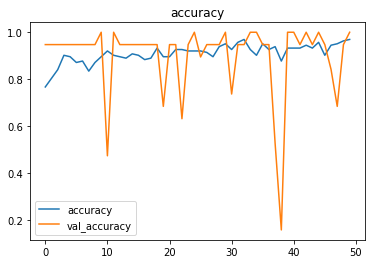

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

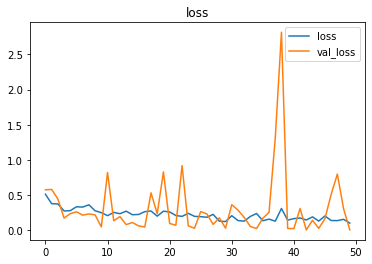

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')

**Evaluate**

In [ ]:
model.evaluate(x_test, y_test)

Start call
3/3 [==============================] - 34s 11s/step - loss: 1.4402 - accuracy: 0.6562


[1.4402450323104858, 0.65625]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = np.argmax(y_test, axis=-1) # [0, 1, 2, ...]

prediction = model.predict(x_test)
y_pred = np.argmax(prediction, axis=-1) # [0, 1, 2, ...]

print(y_true.shape, y_pred.shape)

Start call
(96,) (96,)


In [ ]:
# classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79        86
           1       0.07      0.20      0.11        10

    accuracy                           0.66        96
   macro avg       0.48      0.45      0.45        96
weighted avg       0.80      0.66      0.72        96



In [ ]:
import pandas as pd
# Confusion matrix:
#   row: Ground truth
#   column: predict
mat = confusion_matrix(y_true, y_pred)
pd.DataFrame(mat,
      columns=["{}(predict)".format(all_class[i]) for i in range(2)],
      index=["{}(true)".format(all_class[i]) for i in range(2)])

,MD(predict),MA(predict)
MD(true),61,25
MA(true),8,2


**Save model**

In [ ]:
# 1. save whole model and weights
# model.save('/content/drive/MyDrive/my_model.h5')
# 2. save and load weights only
model.save_weights('/content/drive/MyDrive/my_model_weights.h5')


**Load model**

In [ ]:
# 1. load whole model and weights
# model2 = models.load_model('my_model.h5')
# 2. Rebuild model before load weights !
# model2 = MyModel()
# model2.load_weights('my_model_weights.h5')

**Predict image**

輸入一個網址https://cdn.bella.tw/indeximage/ZfuRCSJKq435WMFZNmoA80ljU1P1PLYWFBESJf8s.jpeg


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Start call
MD 的機率: 0.9989042
MA 的機率: 0.0010957709
答案是: MD


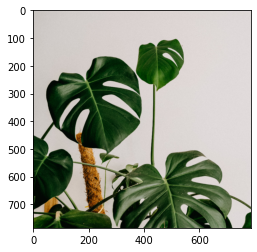

In [ ]:
import requests

url = input("輸入一個網址")
h = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36"
}

response = requests.get(url, stream=True, verify=False, headers=h)
img = Image.open(response.raw)
img_r = img.convert("RGB").resize((256, 256))
img_r = np.array(img_r).reshape(1, 256, 256, 3) / 255.0
proba = model.predict(img_r)[0]
for t, p in zip(all_class, proba):
    print(t, "的機率:", p)
ans = all_class[proba.argmax(axis=-1)]
print("答案是:", ans)
plt.imshow(img)